# This is the baseline model of the project


### The first step is to import the necessary library

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read the train and test data

In [11]:
df_train = pd.read_csv('raw_data/sign_mnist_train.csv')
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [12]:
df_test = pd.read_csv('raw_data/sign_mnist_test.csv')
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [13]:
df_train.dtypes

label       int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 785, dtype: object

In [14]:
df_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


<Axes: xlabel='label', ylabel='Count'>

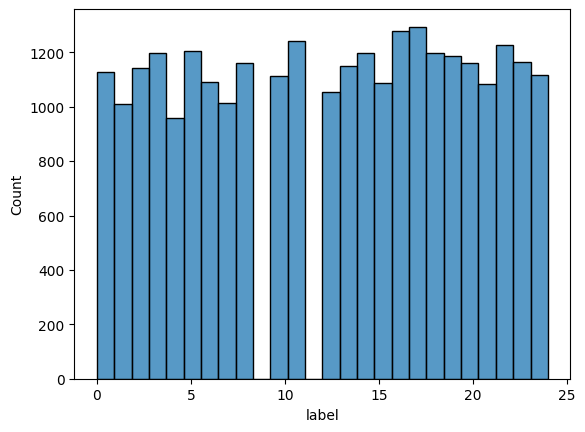

In [19]:
sns.histplot(df_train['label'],bins=26)

In [23]:
X_train = df_train.drop(columns='label')/255
y_train = df_train['label'].copy()
print(X_train.shape,y_train.shape)

(27455, 784) (27455,)


In [24]:
X_test = df_test.drop(columns='label')/255
y_test = df_test['label'].copy()
print(X_test.shape,y_test.shape)

(7172, 784) (7172,)


### Get the baselin Score:
- 1. Use the most frequent value in the training datasets as prediction
- 2. Use a random guess for the test datasets and then calculate the accuracy score

In [25]:
df_train['label'].value_counts().sort_values()

label
4      957
1     1010
7     1013
12    1055
21    1082
15    1088
6     1090
10    1114
24    1118
0     1126
2     1144
13    1151
20    1161
8     1162
23    1164
19    1186
14    1196
3     1196
18    1199
5     1204
22    1225
11    1241
16    1279
17    1294
Name: count, dtype: int64

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
y_pred1 = 17 * np.ones(y_test.shape)
base_score1 = round(accuracy_score(y_test,y_pred1),2)
base_score1

0.02

In [28]:
y_pred2 = np.random.randint(0,25,y_test.shape)
base_score1 = round(accuracy_score(y_test,y_pred2),2)
base_score1

0.04

### The base line score for the total accuracy is 4% accurate by random guess.

In [29]:
img0 = np.reshape(df_train.drop(columns='label').iloc[0],(28,28))
img0.shape

(28, 28)

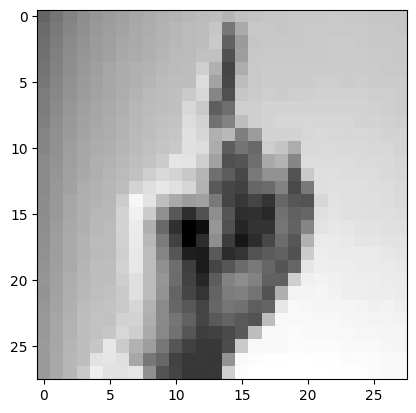

In [30]:
plt.imshow(img0,cmap='gray') 

In [38]:
from sklearn.model_selection import  cross_validate
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.backend import expand_dims

In [32]:
X_train_reshape = np.reshape(X_train,(X_train.shape[0],28,28))
X_test_reshape = np.reshape(X_test,(X_test.shape[0],28,28))

In [34]:
print(X_train_reshape.shape)
print(X_test_reshape.shape)

(27455, 28, 28)
(7172, 28, 28)


In [36]:
X_train_dim = expand_dims(X_train_reshape)
X_test_dim = expand_dims(X_test_reshape)
print(X_train_dim.shape,X_test_dim.shape)

2023-05-22 16:50:48.974791: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-22 16:50:48.977496: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


(27455, 28, 28, 1) (7172, 28, 28, 1)


In [37]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(y_train_cat.shape,y_test_cat.shape)

(27455, 25) (7172, 25)


In [47]:
def initialize_model():

    model = Sequential()

    ### First Convolution & MaxPooling
    model.add(Conv2D(8, kernel_size = (4,4), activation = 'relu', input_shape = (28,28,1), padding = 'same'))
    model.add(MaxPool2D(pool_size = (2,2)))
    
    ### Second Convolution & MaxPooling
    model.add(Conv2D(16, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    model.add(MaxPool2D(pool_size = (2,2)))

    ### Flattening
    model.add(Flatten())
    
    ### One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
    model.add(Dense(10,activation = 'relu'))
    
    ### Last layer - Classification Layer with 10 outputs corresponding to 10 digits
    model.add(Dense(25,activation = 'softmax'))
    
    ### Model compilation
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])
    
    return model

In [48]:
cnn_model = initialize_model()
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 8)         136       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 10)               

In [49]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience = 5, restore_best_weights = True)

In [50]:
cnn_model.fit(X_train_dim,y_train_cat,epochs=1000,batch_size= 32,validation_split=0.2,callbacks=[es])

Epoch 1/1000
687/687 [==============================] - 13s 17ms/step - loss: 2.3968 - accuracy: 0.2417 - val_loss: 1.5671 - val_accuracy: 0.4564
Epoch 2/1000
687/687 [==============================] - 12s 18ms/step - loss: 1.3176 - accuracy: 0.5200 - val_loss: 1.1562 - val_accuracy: 0.5870
Epoch 3/1000
687/687 [==============================] - 13s 19ms/step - loss: 1.0375 - accuracy: 0.6183 - val_loss: 0.9176 - val_accuracy: 0.6636
Epoch 4/1000
687/687 [==============================] - 12s 18ms/step - loss: 0.8521 - accuracy: 0.6888 - val_loss: 0.7777 - val_accuracy: 0.7117
Epoch 5/1000
687/687 [==============================] - 16s 23ms/step - loss: 0.7181 - accuracy: 0.7391 - val_loss: 0.6946 - val_accuracy: 0.7523
Epoch 6/1000
687/687 [==============================] - 27s 40ms/step - loss: 0.6072 - accuracy: 0.7813 - val_loss: 0.5559 - val_accuracy: 0.8073
Epoch 7/1000
687/687 [==============================] - 20s 29ms/step - loss: 0.5218 - accuracy: 0.8178 - val_loss: 0.5022 -

In [52]:
results = cnn_model.evaluate(X_test_dim,y_test_cat)
results

225/225 [==============================] - 1s 5ms/step - loss: 2.7158 - accuracy: 0.7457


[2.7158477306365967, 0.745677649974823]

## A simple CNN model provided the accuracy of test data 75%. This is considered our baseline model

The model will be saved for future use.

In [53]:
cnn_model.save('./base_line_model/base_cnn_model')

INFO:tensorflow:Assets written to: ./base_line_model/base_cnn_model/assets


INFO:tensorflow:Assets written to: ./base_line_model/base_cnn_model/assets


In [54]:
from tensorflow.keras.models import load_model
reload_cnn_model = load_model('./base_line_model/base_cnn_model')

In [78]:
y_pred_cat = reload_cnn_model.predict(X_test_dim)
y_pred_cat

225/225 [==============================] - 1s 4ms/step


array([[0.0000000e+00, 0.0000000e+00, 3.2581341e-22, ..., 4.3763416e-16,
        3.0830303e-09, 2.5922016e-18],
       [3.1309459e-30, 6.6239196e-14, 1.8069660e-07, ..., 1.7742698e-13,
        1.9977339e-04, 6.3938928e-38],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 3.9163836e-24,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.4125376e-24, 0.0000000e+00, 4.2527533e-01, ..., 0.0000000e+00,
        1.0272692e-21, 0.0000000e+00],
       [4.3174030e-30, 6.8171363e-26, 3.6268110e-21, ..., 0.0000000e+00,
        1.3350400e-34, 0.0000000e+00],
       [9.2097470e-25, 0.0000000e+00, 3.1468276e-02, ..., 0.0000000e+00,
        2.2904352e-23, 0.0000000e+00]], dtype=float32)

In [79]:
y_pred_cat.shape

(7172, 25)

In [80]:
y_lst = range(0,25) 

In [81]:
import string
letters = [letter for letter in string.ascii_lowercase]

In [77]:
y_pred_cat.shape

(7172, 25)

In [84]:
y_pred = np.argmax(y_pred_cat,axis=1)
y_pred

array([ 6,  5, 10, ..., 14,  4, 14])

In [85]:
base_test_score = accuracy_score(y_test,y_pred)
base_test_score

0.7456776352481874

Show how we predict one test example

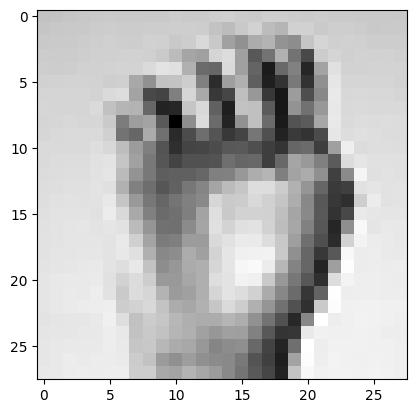

In [86]:
img = X_test_reshape[101]
plt.imshow(img,cmap='gray')

In [99]:
y_test[101]

4

In [102]:
letters[y_test[101]]

'e'

In [108]:
x101 = df_test.drop(columns='label').iloc[101]

In [130]:
x101.T.shape

(784,)

In [153]:
x101_reshape = x101/255
x101_reshape = np.reshape(x101_reshape,(28,28,1))
x101_reshape.shape

(28, 28, 1)

In [154]:
x101_preproc = expand_dims(x101_reshape,axis=[0])
x101_preproc.shape

TensorShape([1, 28, 28, 1])

In [152]:
y101_pred_cat = reload_cnn_model.predict(x101_preproc)
y101_pred_cat.shape

1/1 [==============================] - 0s 50ms/step


(1, 25)

In [124]:
y101_pred = np.argmax(y101_pred_cat,axis=1)
y101_pred

array([4])

In [155]:
type(x101_reshape)

numpy.ndarray

In [181]:
#import os
#os.mkdir('./test_image/')
for i in range(len(df_test)):
    x = df_test.drop(columns='label').iloc[i].astype('int')
    X = np.reshape(x,(28,28))
    print(X.shape,end='\r')
    np.savetxt(f'./test_image/{i}.txt',X,delimiter=',',fmt = '%i')

(28, 28)
d


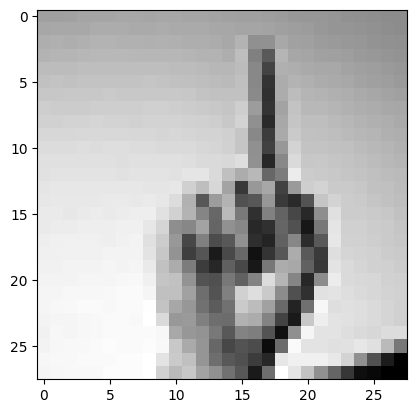

In [180]:
img_num = 1000
img = pd.read_csv(f'./test_image/{img_num}.txt',header=None)
print(img.shape)
print(letters[y_test[img_num]])
plt.imshow(img,cmap='gray')
